In [1]:
! pip install scikit-learn scipy matplotlib
! pip install pandas
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [3]:
columns = ["s", "x", "y", "label"]
df_test = pd.read_csv('./Data_test.csv', names=columns)[1:]
df_train = pd.read_csv('./Data_train.csv', names=columns)[1:]

In [4]:
X_train = df_train.iloc[: , 1: 3]
X_train = np.array(X_train, dtype=float)
X_test = df_test.iloc[: , 1: 3]
X_test = np.array(X_test, dtype=float)
y_train = np.array(df_train['label'], dtype=int)
y_test = np.array(df_test['label'], dtype=int)

In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [6]:
"""
Task 0: Naïve Logistic Regression [5 pts] 
Make a logistic regression and report the accuracy.
"""
class LogisticRegression:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_predictions = np.dot(X, self.weights) + self.bias
            actual_predictions = sigmoid(linear_predictions)

            dw = (1 / n_samples) * np.dot(X.T, (actual_predictions - y))
            db = (1 / n_samples) * np.sum(actual_predictions - y)

            # Updating the weights and bias
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        return [0 if y<=0.5 else 1 for y in sigmoid(linear_predictions)]


In [24]:
logistic_classifier = LogisticRegression(lr=0.1)
logistic_classifier.fit(X_train, y_train)
y_predicted = logistic_classifier.predict(X_test)
accuracy = np.sum(y_predicted == y_test) / len(y_test)
print("Accuracy of logistic regression is : ", accuracy)

Accuracy of logistic regression is :  0.26986666666666664


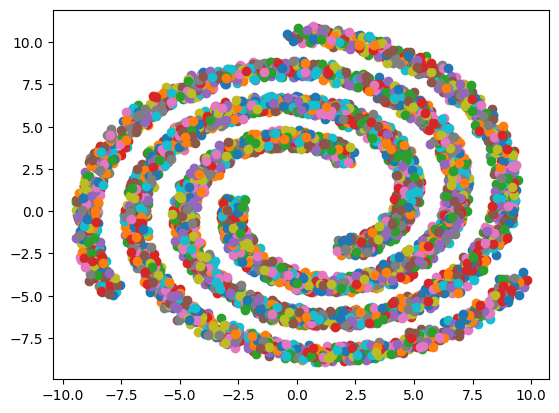

In [25]:
"""
Task 1: Train Data Transformation [30 pts] 

Perform the pre-processing to transform the original data into a new feature space by doing 
feature engineering so the features are linear in the new space. Confirm four assumptions 
required for a linear classifier.
"""
print("ORIGINAL DATA")
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1])

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_train)
print("TRANSFORMED DATA")
print(principalComponents)
# for i in range(len(principalComponents)):
#     plt.scatter(principalComponents[i][0], principalComponents[i][1])

TRANSFORMED DATA
[[-7.84738243]
 [ 5.74403107]
 [-5.01617846]
 ...
 [-3.35797534]
 [ 7.11277076]
 [-4.78055861]]
